In [2]:
import tensorflow as tf

# Disable GPU, force CPU usage for macM2
tf.config.set_visible_devices([], 'GPU')
print("Using CPU instead of GPU")

Using CPU instead of GPU


In [3]:
import numpy as np
import pandas as pd #needed for the CSV files
import matplotlib.pyplot as plt # For visualizations
import seaborn as sns # even better visuals for data (maybe use later?)

# datasets
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")

# Check dataset shape and preview first few rows
print(train.shape)
train.head() #first 5 rows 

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Separate features (pixels) and labels
X = train.iloc[:, 1:].values  # Pixel values
y = train.iloc[:, 0].values   # Digit labels (0 thru 9)

# Normalize pixel values (scale from 0-255 to 0-1)
X = X / 255.0

# Reshape for CNN input (28x28 pixels, 1 channel for grayscale)
X = X.reshape(-1, 28, 28, 1) # the -1 lets NumPy infer batch size

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=10)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation to increase dataset diversity
# Added to simulate different handwriting sizes
datagen = ImageDataGenerator(
    rotation_range=15,  # rotate for slanted handwriting
    width_shift_range=0.1,  # Shift width by 10%
    height_shift_range=0.1,  # Shift height by 10%
    zoom_range=0.1  # Zoom in/out by 10%
)

# Fit the generator to training data
datagen.fit(X_train)

In [28]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
#added BatchNormalization
# Improved CNN Model with BN
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Prevent overfitting (increase if needed later (note the increase in epochs))
    Dense(10, activation='softmax')
])
# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    validation_data=(X_val, y_val),
                    epochs=20)  # Increased from previous 10 epochs

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


525/525 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7447 - loss: 0.9127 - val_accuracy: 0.9140 - val_loss: 0.2573
Epoch 2/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.9331 - loss: 0.2303 - val_accuracy: 0.9775 - val_loss: 0.0680
Epoch 3/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.9450 - loss: 0.1847 - val_accuracy: 0.9838 - val_loss: 0.0512
Epoch 4/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.9575 - loss: 0.1443 - val_accuracy: 0.9837 - val_loss: 0.0485
Epoch 5/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.9632 - loss: 0.1333 - val_accuracy: 0.9514 - val_loss: 0.1651
Epoch 6/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9654 - loss: 0.1156 - val_accuracy: 0.9875 - val_loss: 0.0434
Epoch 7/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.9664 - loss: 0.1183 - val_accuracy: 0.9862 - val_loss: 0.0351
Epoch 8/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.9711 - loss: 0.1001 - val_accurac

In [29]:
test_images = test.values / 255.0  # Normalize test images
test_images = test_images.reshape(-1, 28, 28, 1)

predictions = model.predict(test_images) # Use trained model
predicted_labels = np.argmax(predictions, axis=1)  # Get predicted digit for each image

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Pick 5 random images from the validation set
random_indices = np.random.randint(0, len(X_val), size=10)
random_images = X_val[random_indices]
random_labels = y_val[random_indices]  # Actual labels

# Make predictions
predictions = model.predict(random_images)
predicted_labels = np.argmax(predictions, axis=1)

# Print results
print("Predicted labels:", predicted_labels)
print("Actual labels:   ", np.argmax(random_labels, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted labels: [3 1 8 5 5 4 6 6 9 3]
Actual labels:    [3 1 8 5 5 4 6 6 9 3]


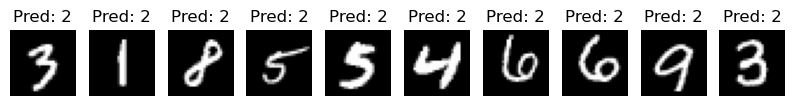

In [33]:
plt.figure(figsize=(10,5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_val[idx].reshape(28, 28), cmap="grey")
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis("off")

plt.show()

In [24]:
model.save("digit_recognizer.keras")